In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../STATISTIEKEN_BACHELORPROEF_ATS.csv')

In [3]:
df.columns

Index(['paper', 'model', 'sentence', 'FRE', 'FOG', 'characters_per_word',
       'syll_per_word', 'words_per_sentence', 'sentences_per_paragraph',
       'type_token_ratio', 'characters', 'syllables', 'words', 'wordtypes',
       'sentences', 'paragraphs', 'long_words', 'complex_words',
       'complex_words_dc', 'tobeverb', 'auxverb', 'conjunction', 'pronoun',
       'preposition', 'nominalization', 'interrogative', 'article',
       'subordination'],
      dtype='object')

In [4]:
df.model.value_counts()

ORIGINAL 0          646
SIMPLIFIED T4P2     267
SIMPLIFIED T3       249
SIMPLIFIED T4P1     216
SIMPLIFIED T4P3     131
SIMPLIFIED MTSL      94
SIMPLIFIED T1        65
SIMPLIFIED MTSL2     53
SIMPLIFIED T2        24
Name: model, dtype: int64

In [5]:
df.paper.value_counts()

Artikel 2 BN    810
Artikel 1 AI    579
Artikel 3 PE    239
Artikel 4 GE    117
Name: paper, dtype: int64

In [6]:
used_articles = df['paper'].unique()[:2]

In [7]:
df = df[df['paper'].isin(used_articles)]

## Algemene grafiek voor poster en presentatie

In [8]:
data = df[df['FRE'] > 0]

In [9]:
data.groupby('paper').count()['sentence']

paper
Artikel 1 AI    414
Artikel 2 BN    699
Name: sentence, dtype: int64

In [10]:
data.groupby('model').count()['sentence']

model
ORIGINAL 0          237
SIMPLIFIED MTSL      86
SIMPLIFIED MTSL2     50
SIMPLIFIED T1        50
SIMPLIFIED T2        18
SIMPLIFIED T3       197
SIMPLIFIED T4P1     159
SIMPLIFIED T4P2     222
SIMPLIFIED T4P3      94
Name: sentence, dtype: int64

In [11]:
data.groupby('model')['words_per_sentence'].sum()

model
ORIGINAL 0          4447.166667
SIMPLIFIED MTSL     1942.500000
SIMPLIFIED MTSL2     760.000000
SIMPLIFIED T1        988.833333
SIMPLIFIED T2        319.000000
SIMPLIFIED T3       3690.916667
SIMPLIFIED T4P1     3270.000000
SIMPLIFIED T4P2     4442.000000
SIMPLIFIED T4P3     1351.000000
Name: words_per_sentence, dtype: float64

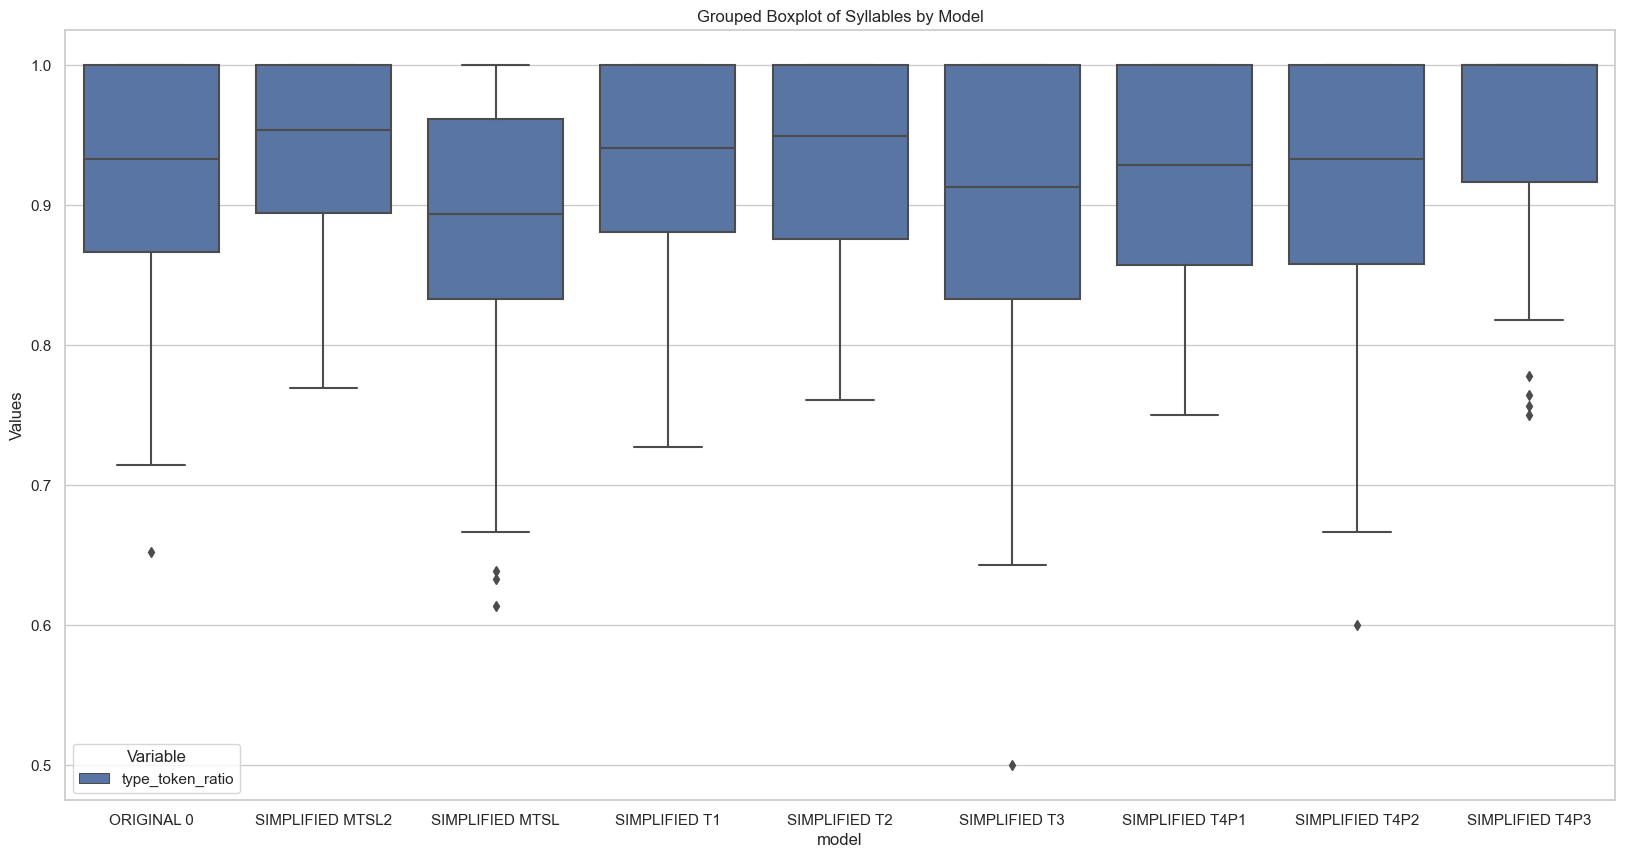

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'data'
columns_to_plot = ['type_token_ratio']
group_by_column = 'model'

# Set the style of the plot
sns.set(style="whitegrid")

# Reshape the data using melt()
melted_data = pd.melt(data, id_vars=[group_by_column], value_vars=columns_to_plot,
                      var_name='Variable', value_name='Value')

# Set the figsize
plt.figure(figsize=(20, 10))

# Create the grouped boxplot
sns.boxplot(data=melted_data, x=group_by_column, y='Value', hue='Variable')

# Set the title and labels for the plot
plt.title("Grouped Boxplot of Syllables by Model")
plt.xlabel(group_by_column)
plt.ylabel("Values")

# Show the plot
plt.show()


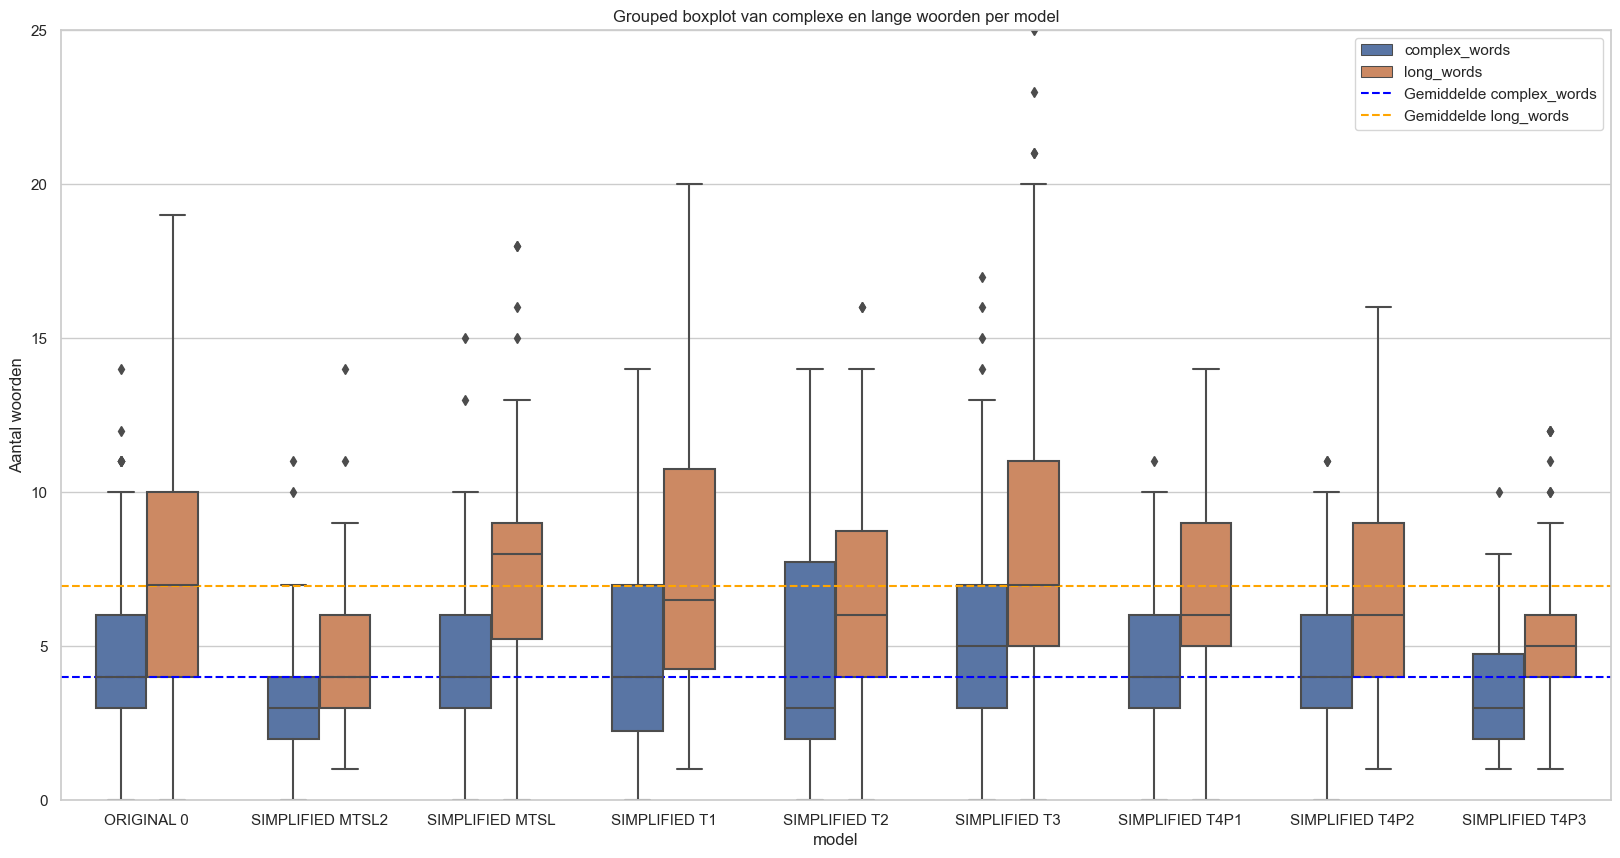

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is named 'data'
columns_to_plot = ['complex_words', 'long_words']
group_by_column = 'model'

# Set the style of the plot
sns.set(style="whitegrid")

# Reshape the data using melt()
melted_data = pd.melt(data, id_vars=[group_by_column], value_vars=columns_to_plot,
                      var_name='Variable', value_name='Value')

# Calculate the median and average values for each column
median_values = melted_data.groupby('Variable')['Value'].median()
average_values = melted_data.groupby('Variable')['Value'].mean()

# Set the figsize
plt.figure(figsize=(20, 10))

# Create the grouped boxplot with narrower width
sns.boxplot(data=melted_data, x=group_by_column, y='Value', hue='Variable', width=0.6)

# Add horizontal lines for median and average for each column
for column, median in median_values.items():
    average = average_values[column]
    if column == columns_to_plot[1]:
        plt.axhline(average, linestyle='--', color='orange', label='Gemiddelde ' + column)
    else:
        plt.axhline(median, linestyle='--', color='blue', label='Gemiddelde ' + column)

# Set the title and labels for the plot
plt.title("Grouped boxplot van complexe en lange woorden per model")
plt.xlabel(group_by_column)
plt.ylabel("Aantal woorden")

# Set the y-axis limits
plt.ylim(0, 25)

# Show the legend
plt.legend()

# Adjust spacing between subplots
plt.subplots_adjust(wspace=1)

# Show the plot
plt.savefig('boxplot-poster.png')
plt.show()

# Artikel 1

In [49]:
artikel_1 = df[(df['paper'] == 'Artikel 1 AI') & (df['FRE'] > 0)]

In [50]:
artikel_1.groupby('model').count()['sentence']

model
ORIGINAL 0         78
SIMPLIFIED MTSL    43
SIMPLIFIED T1      26
SIMPLIFIED T2      11
SIMPLIFIED T3      67
SIMPLIFIED T4P1    61
SIMPLIFIED T4P2    89
SIMPLIFIED T4P3    39
Name: sentence, dtype: int64

In [51]:
artikel_1.groupby('model')['words_per_sentence'].sum()

model
ORIGINAL 0         1635.000000
SIMPLIFIED MTSL     924.500000
SIMPLIFIED T1       474.833333
SIMPLIFIED T2       212.000000
SIMPLIFIED T3      1357.166667
SIMPLIFIED T4P1    1309.000000
SIMPLIFIED T4P2    1817.000000
SIMPLIFIED T4P3     497.000000
Name: words_per_sentence, dtype: float64

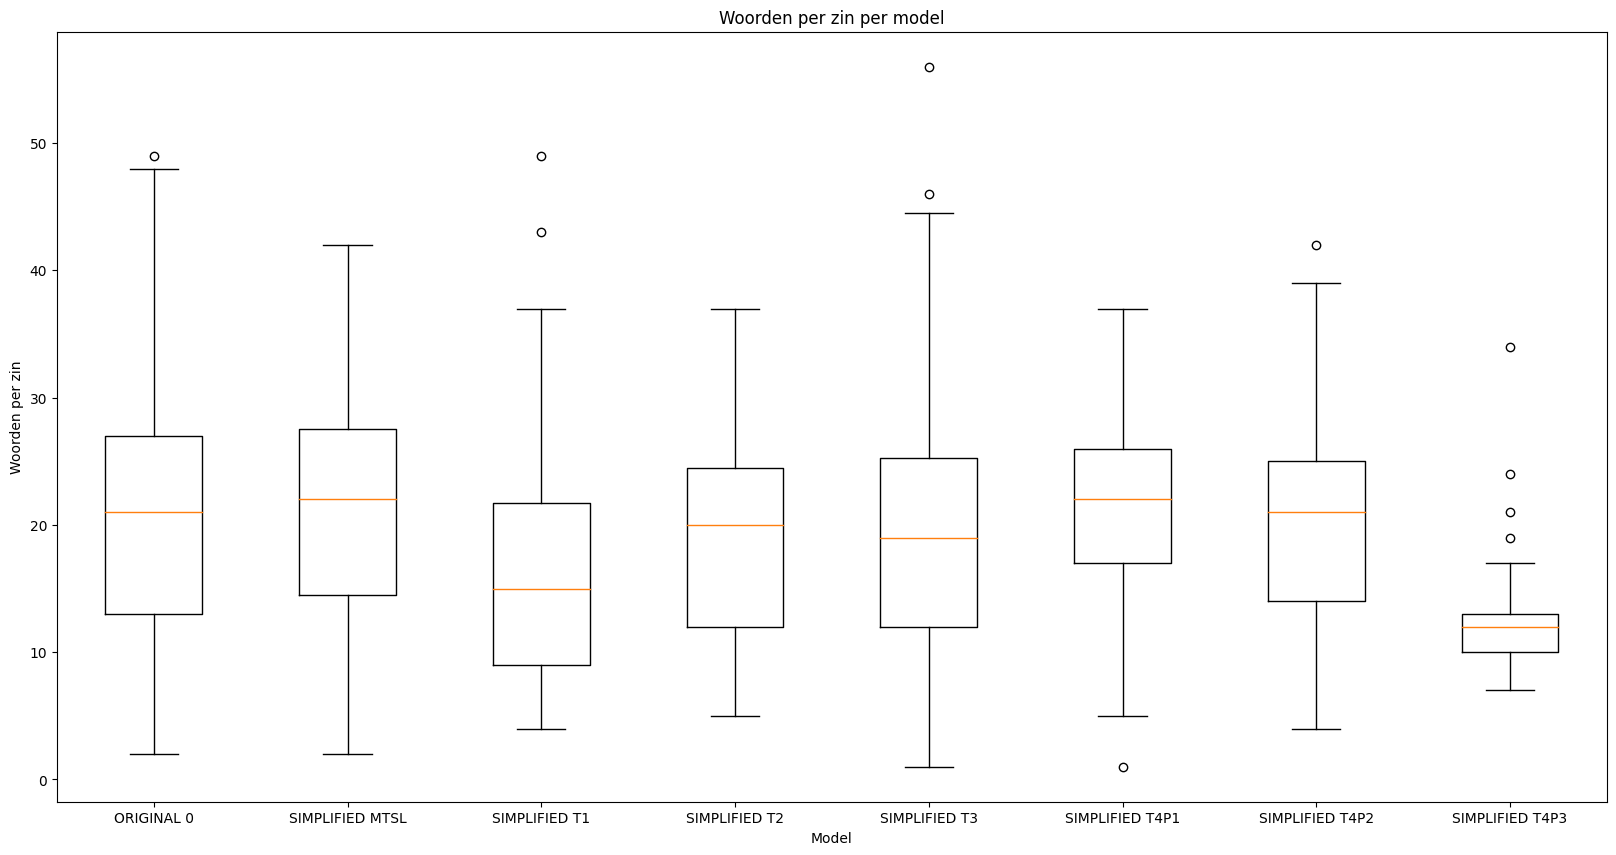

In [52]:
data = artikel_1.groupby('model')['words_per_sentence']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Woorden per zin')
plt.savefig('boxplot-avg-a1.png')

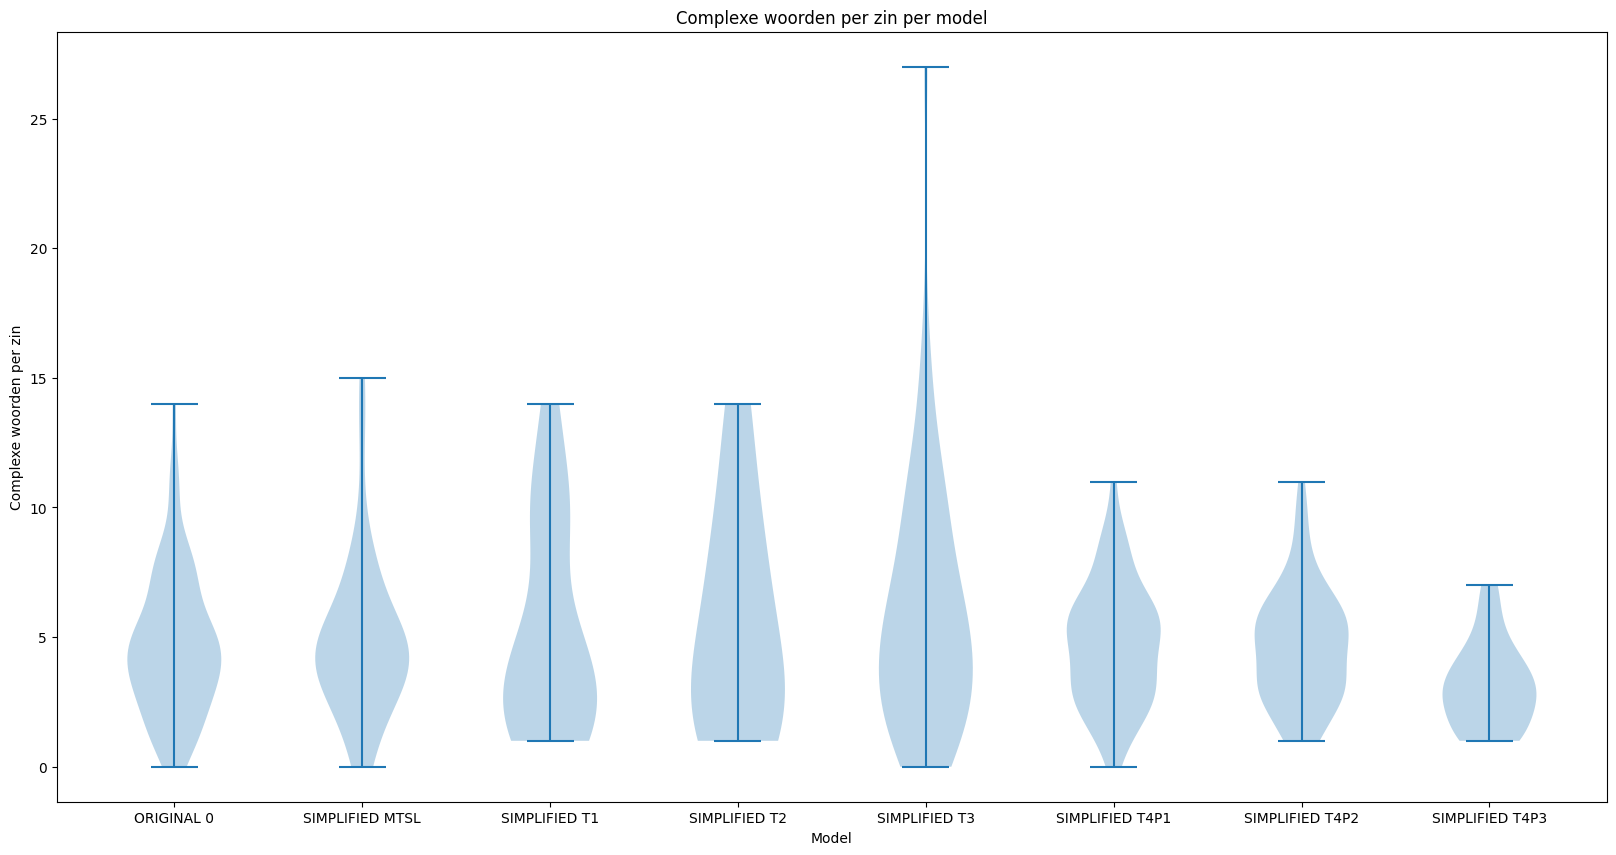

In [53]:
data = artikel_1.groupby('model')['complex_words']
data_list = [group[1].tolist() for group in data]

plt.figure(figsize=(20, 10))
plt.violinplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Complexe woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Complexe woorden per zin')
plt.savefig('violinplot-complex-a1.png')

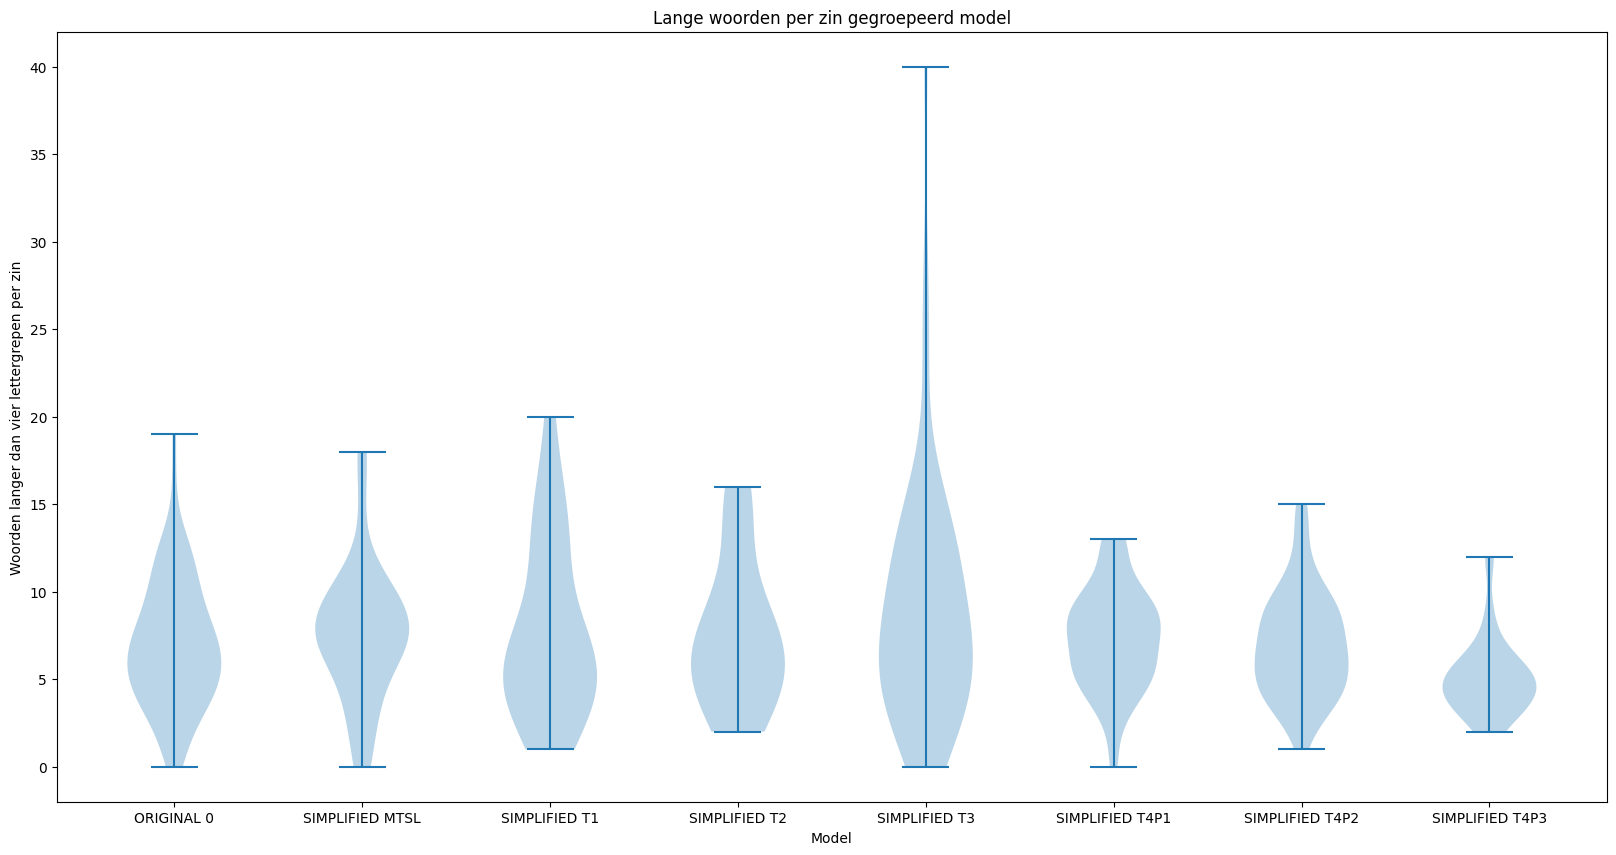

In [54]:
data = artikel_1.groupby('model')['long_words']
data_list = [group[1].tolist() for group in data]

plt.figure(figsize=(20, 10))
plt.violinplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Lange woorden per zin gegroepeerd model')
plt.xlabel('Model')
plt.ylabel('Woorden langer dan vier lettergrepen per zin')
plt.savefig('violinplot-long-a1.png')

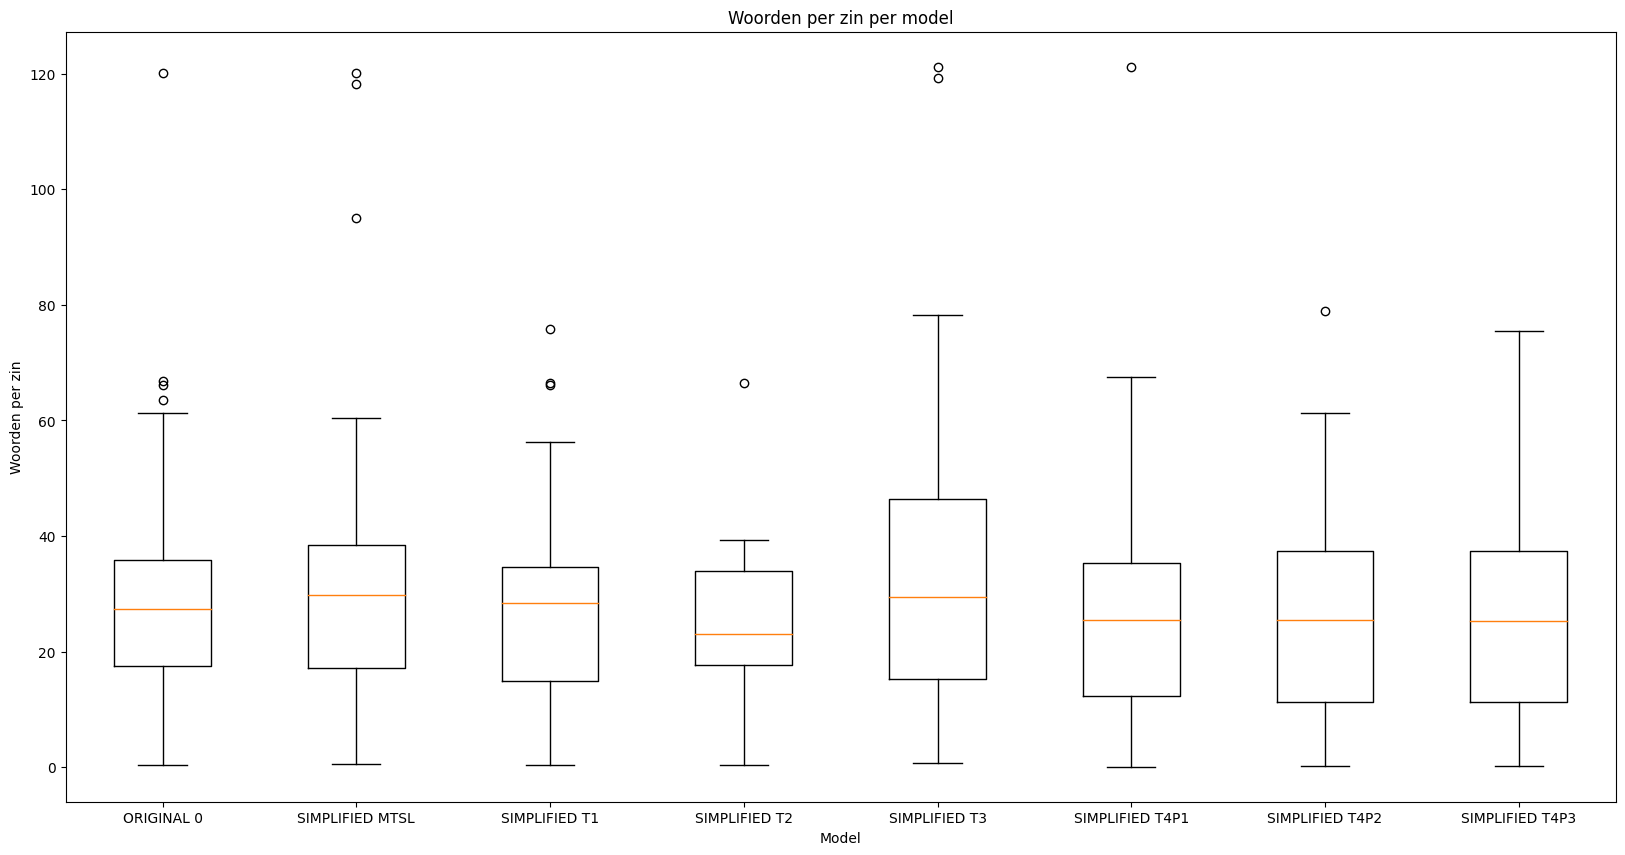

In [55]:
data = artikel_1.groupby('model')['FRE']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Woorden per zin')
plt.savefig('boxplot-fre-a1.png')

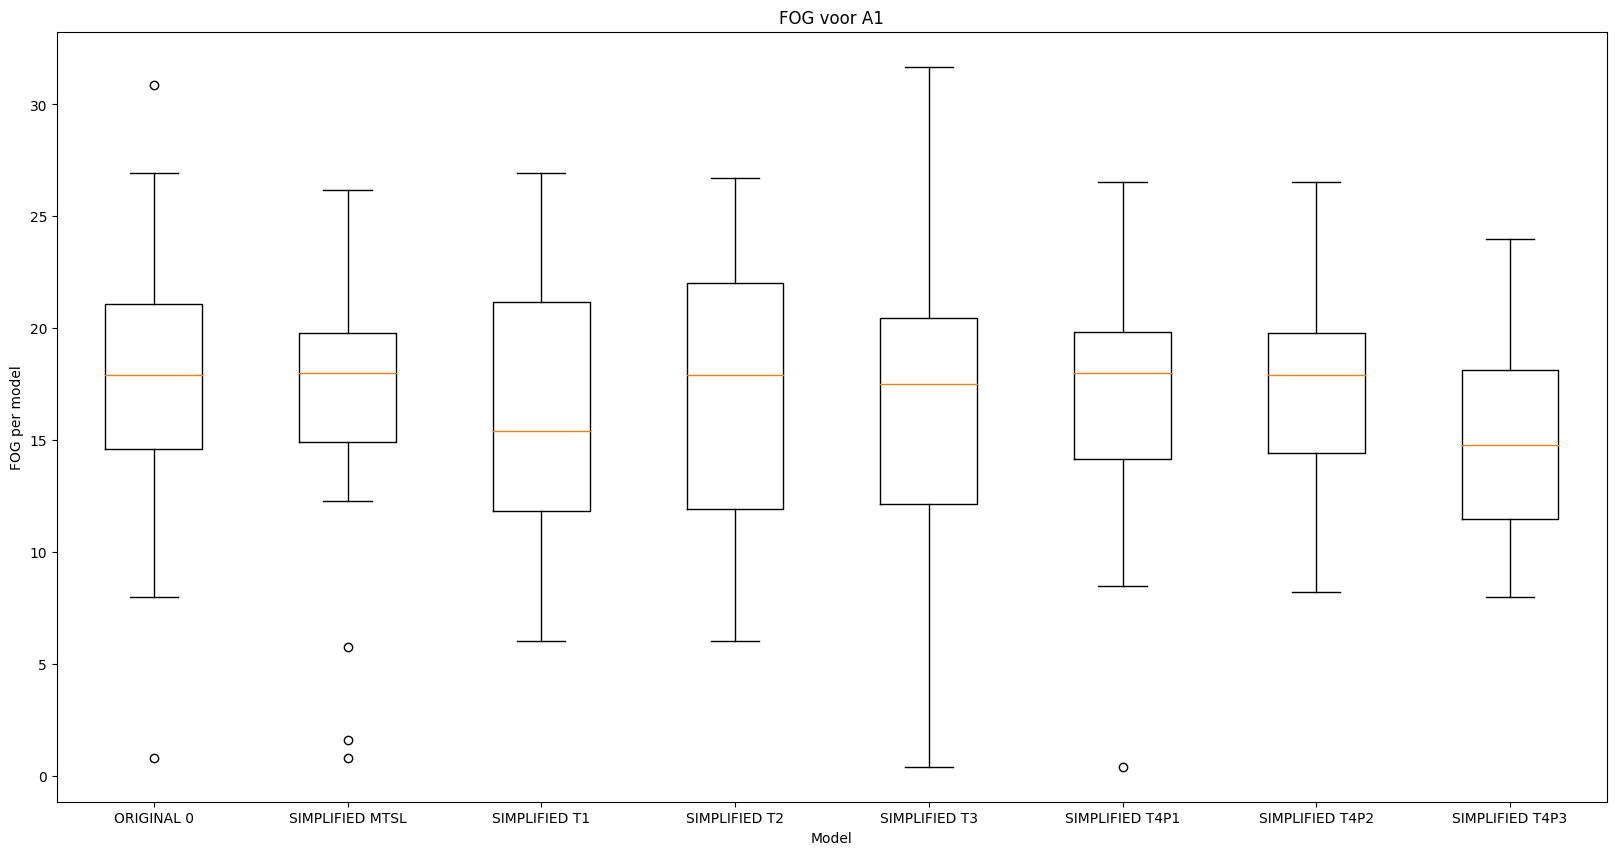

In [56]:
data = artikel_1.groupby('model')['FOG']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('FOG voor A1')
plt.xlabel('Model')
plt.ylabel('FOG per model')
plt.savefig('boxplot-fog-a1.png')

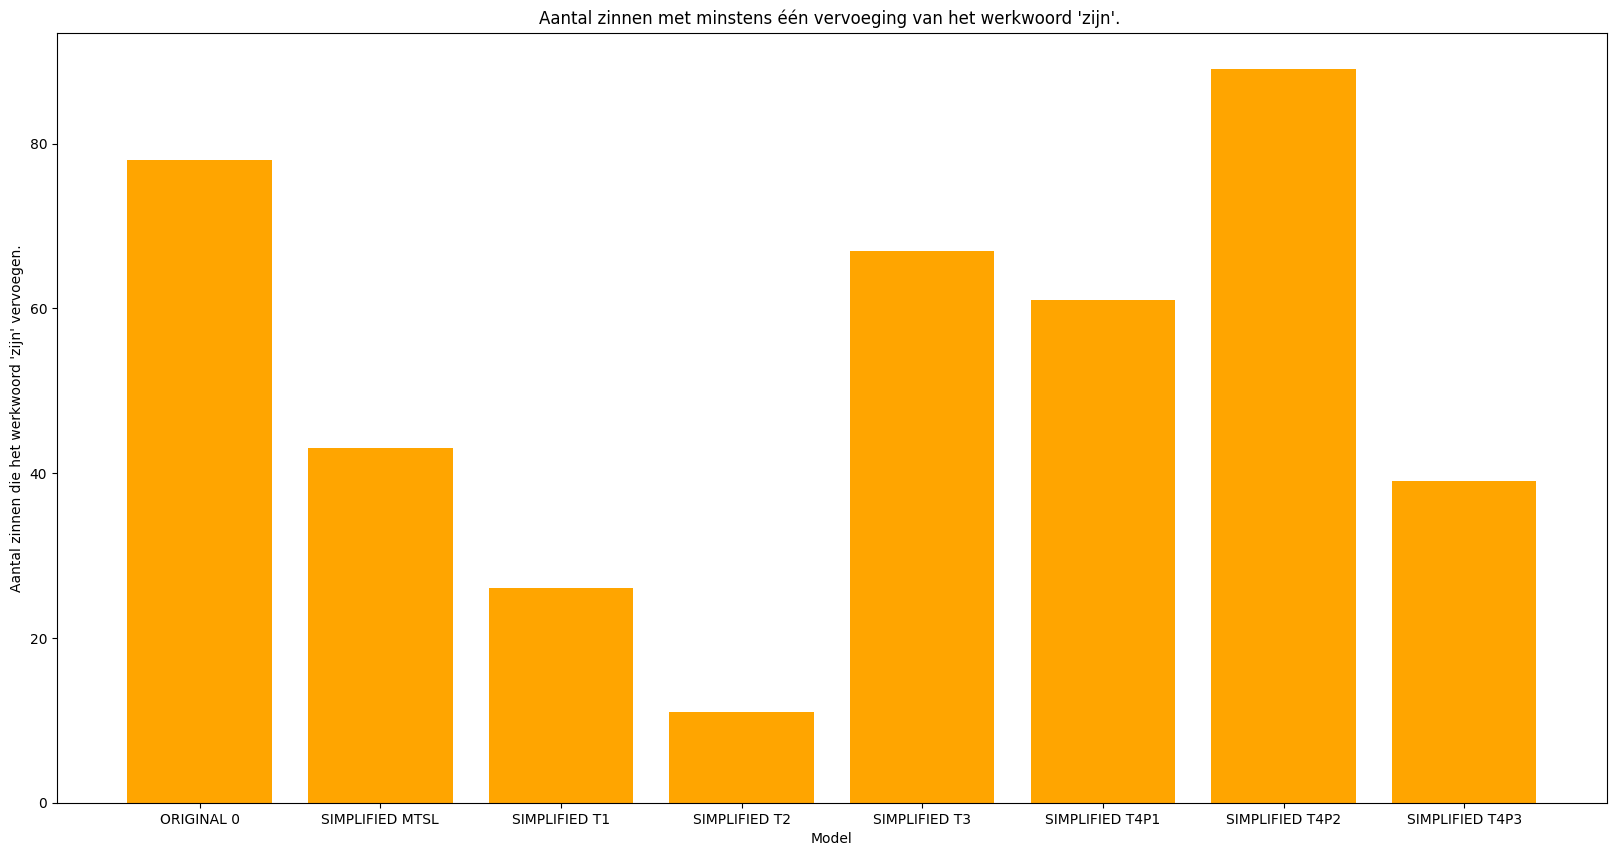

In [57]:
data = artikel_1.groupby('model')['tobeverb'].count()
plt.figure(figsize=(20, 10))
color = 'orange'
plt.bar(data.index, data.values, color=color)
plt.xlabel('Model')
plt.ylabel("Aantal zinnen die het werkwoord 'zijn' vervoegen.")
plt.title("Aantal zinnen met minstens één vervoeging van het werkwoord 'zijn'. ")
plt.savefig('boxplot-tobe-a1.png')

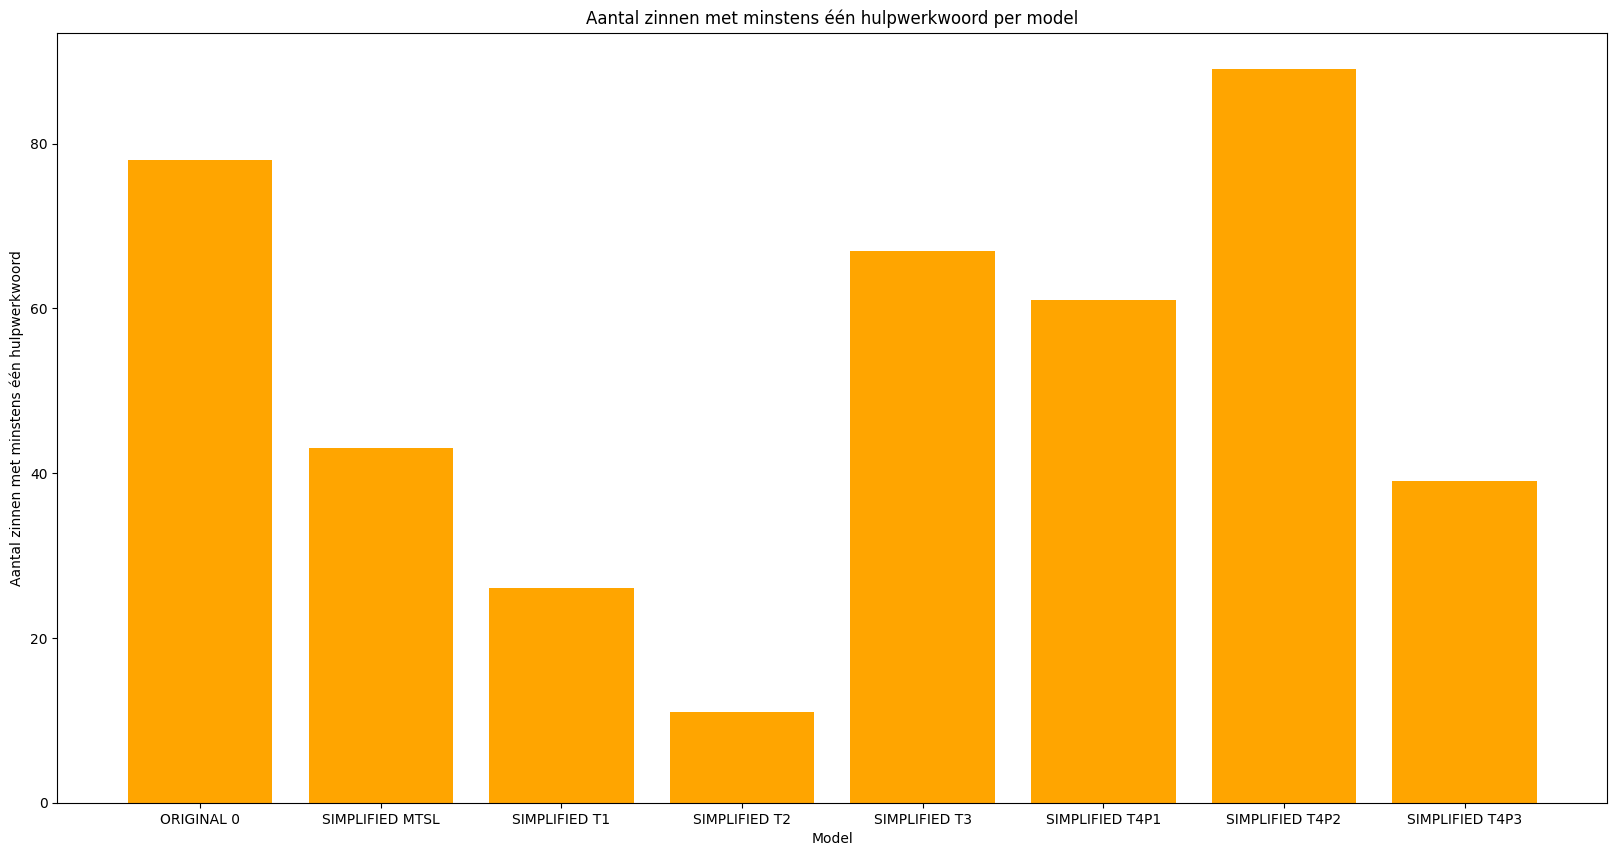

In [58]:
data = artikel_1.groupby('model')['auxverb'].count()
plt.figure(figsize=(20, 10))
color = 'orange'
plt.bar(data.index, data.values, color=color)
plt.xlabel('Model')
plt.ylabel('Aantal zinnen met minstens één hulpwerkwoord')
plt.title('Aantal zinnen met minstens één hulpwerkwoord per model')
plt.savefig('boxplot-aux-a1.png')

# Artikel 2

In [59]:
artikel_2 = df[(df['paper'] == 'Artikel 2 BN') & (df['FRE'] > 0)]

In [60]:
artikel_2.groupby('model').count()['sentence']

model
ORIGINAL 0          159
SIMPLIFIED MTSL      43
SIMPLIFIED MTSL2     50
SIMPLIFIED T1        24
SIMPLIFIED T2         7
SIMPLIFIED T3       130
SIMPLIFIED T4P1      98
SIMPLIFIED T4P2     133
SIMPLIFIED T4P3      55
Name: sentence, dtype: int64

In [61]:
artikel_2.groupby('model')['words_per_sentence']

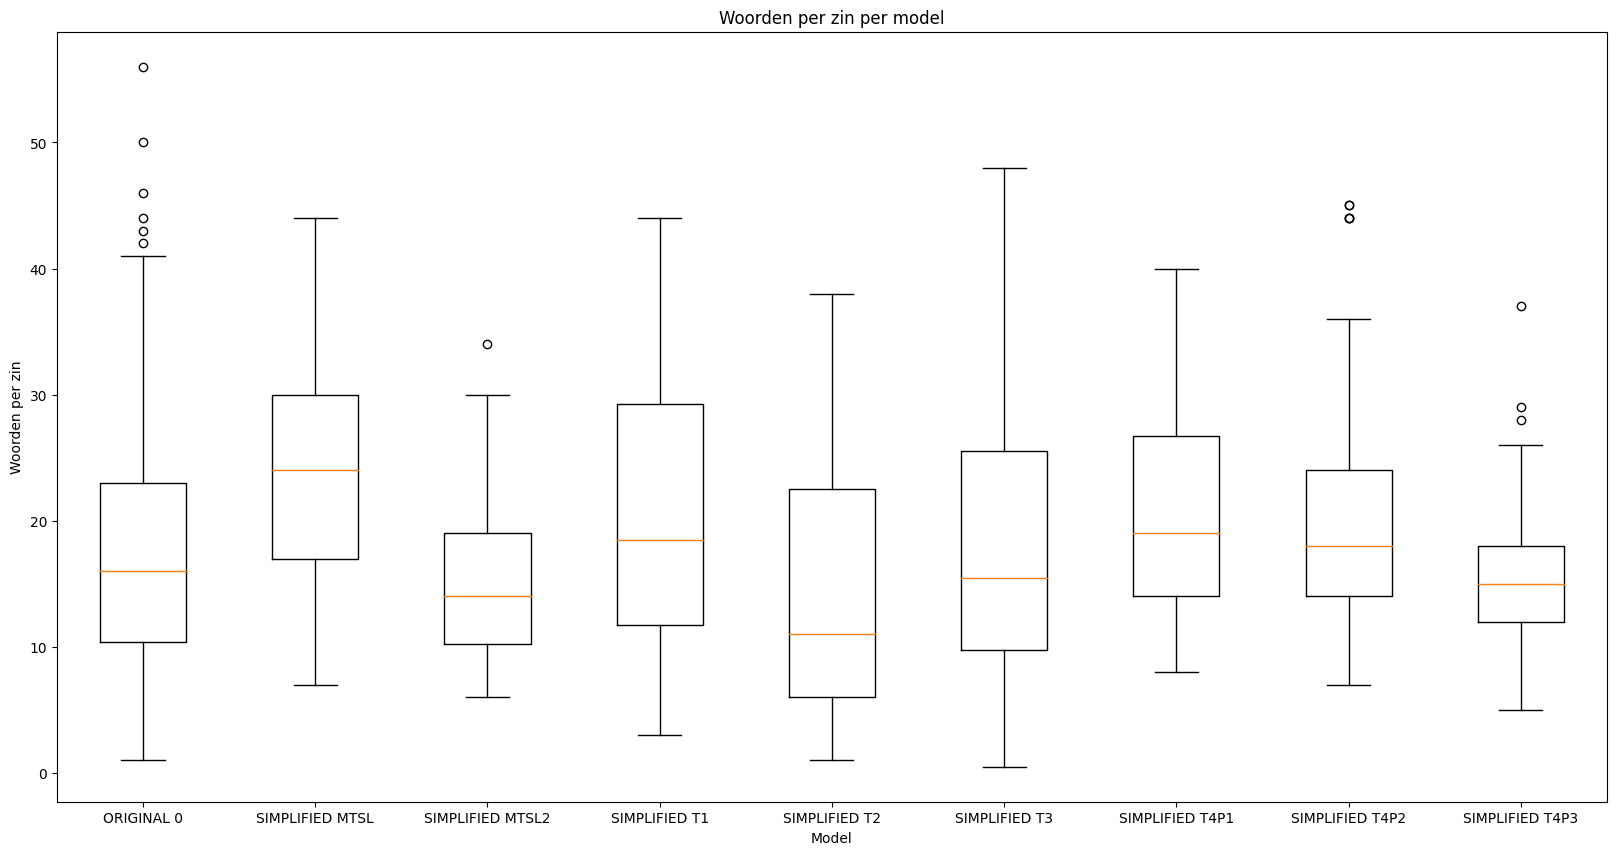

In [62]:
data = artikel_2.groupby('model')['words_per_sentence']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Woorden per zin')
plt.savefig('boxplot-avg-a2.png')

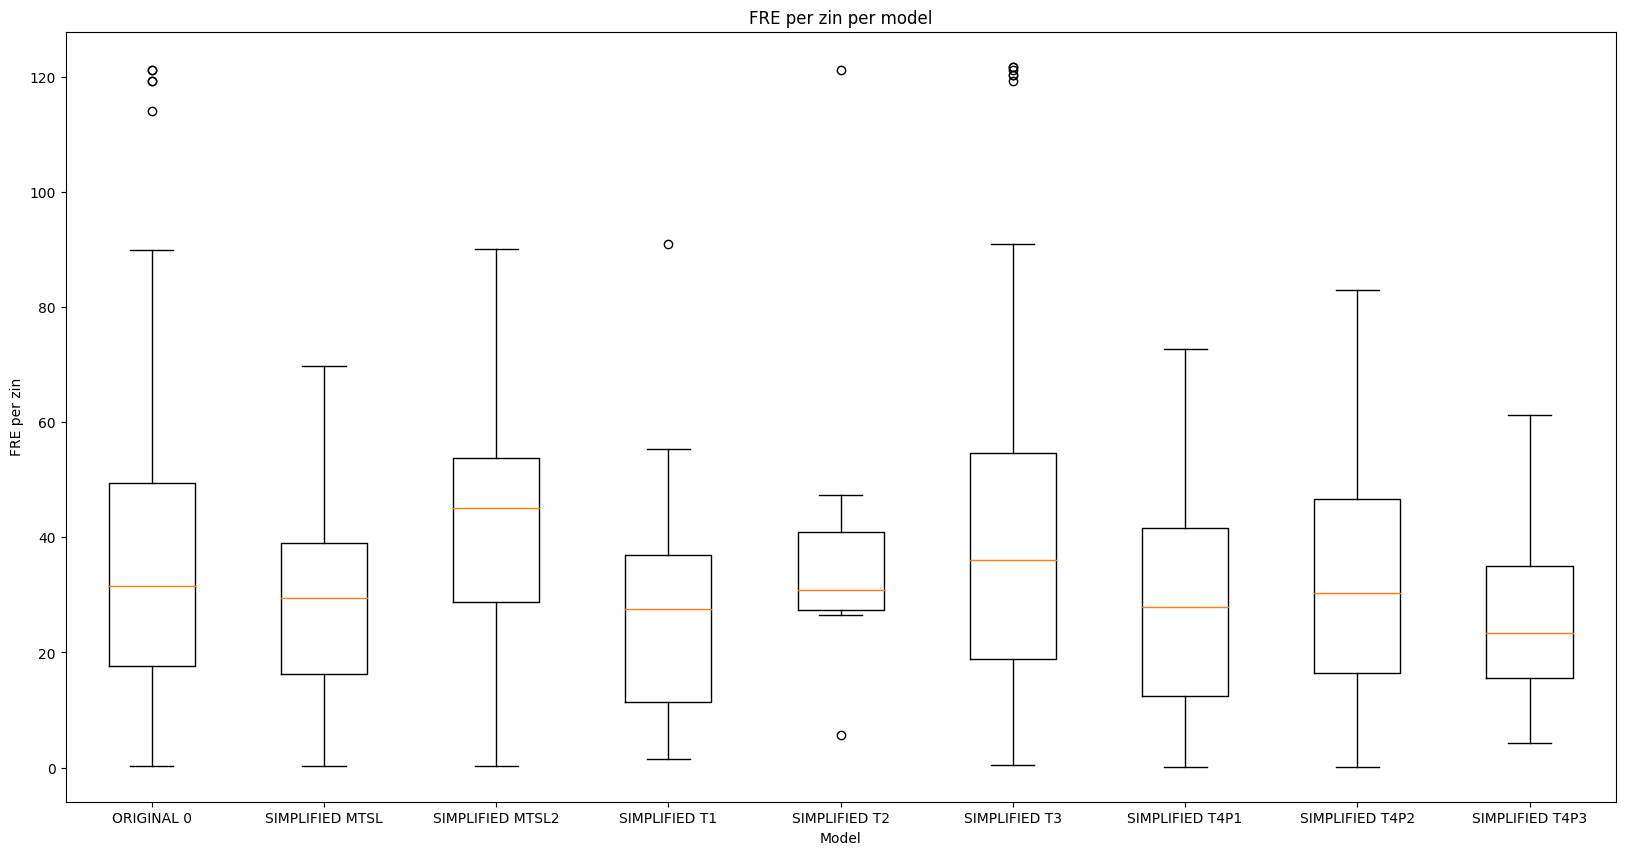

In [63]:
data = artikel_2.groupby('model')['FRE']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('FRE per zin per model')
plt.xlabel('Model')
plt.ylabel('FRE per zin')
plt.savefig('boxplot-fre-a2.png')

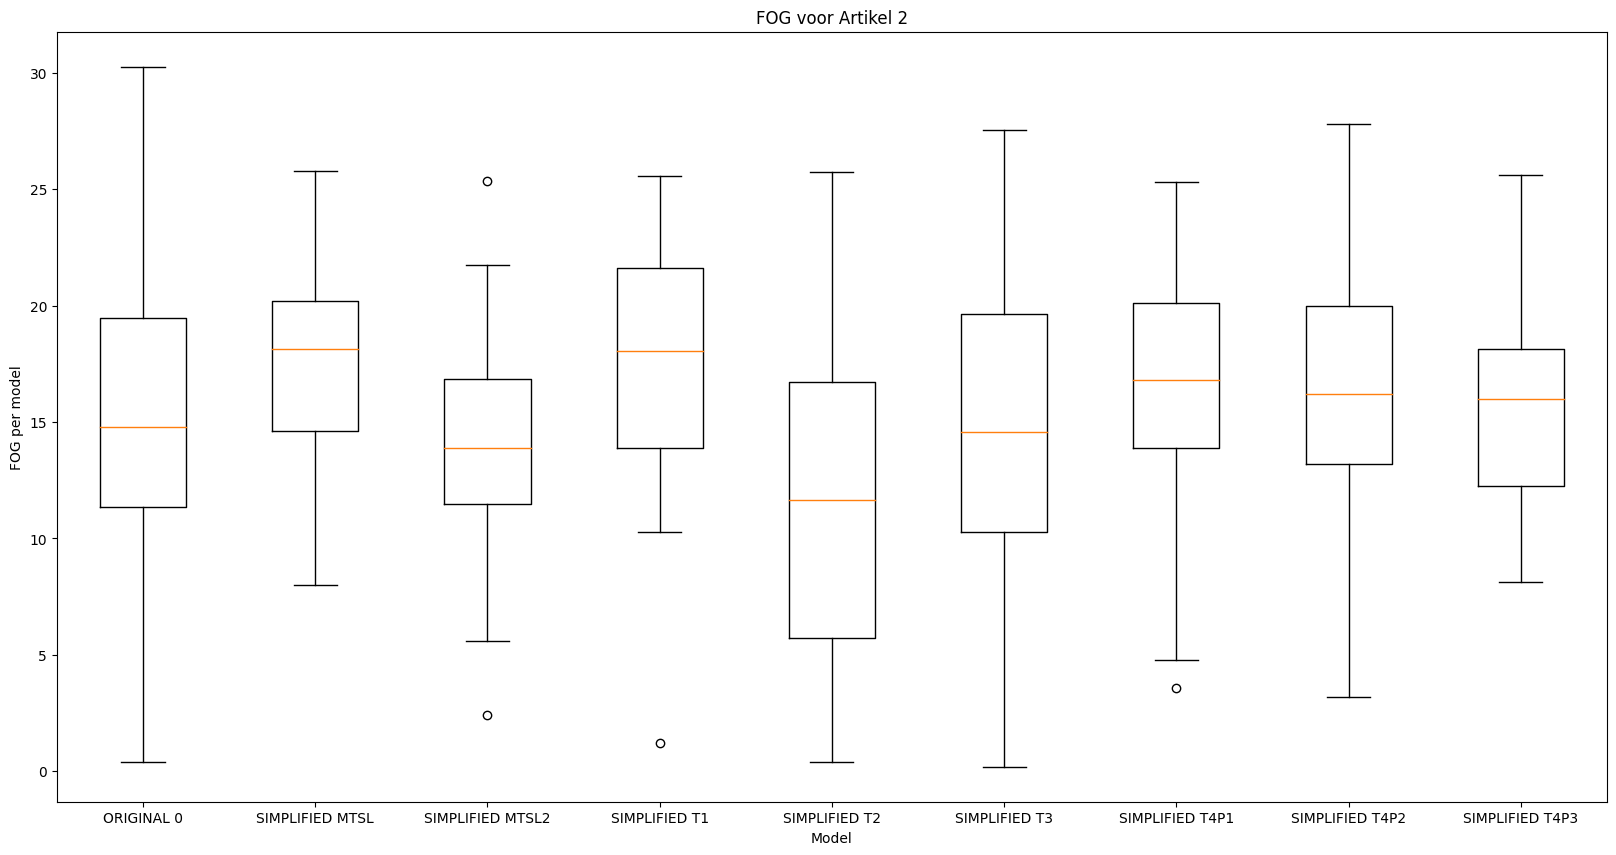

In [64]:
data = artikel_2.groupby('model')['FOG']
data_list = [group[1].tolist() for group in data]
plt.figure(figsize=(20,10))
plt.boxplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('FOG voor Artikel 2')
plt.xlabel('Model')
plt.ylabel('FOG per model')
plt.savefig('boxplot-fog-a2.png')

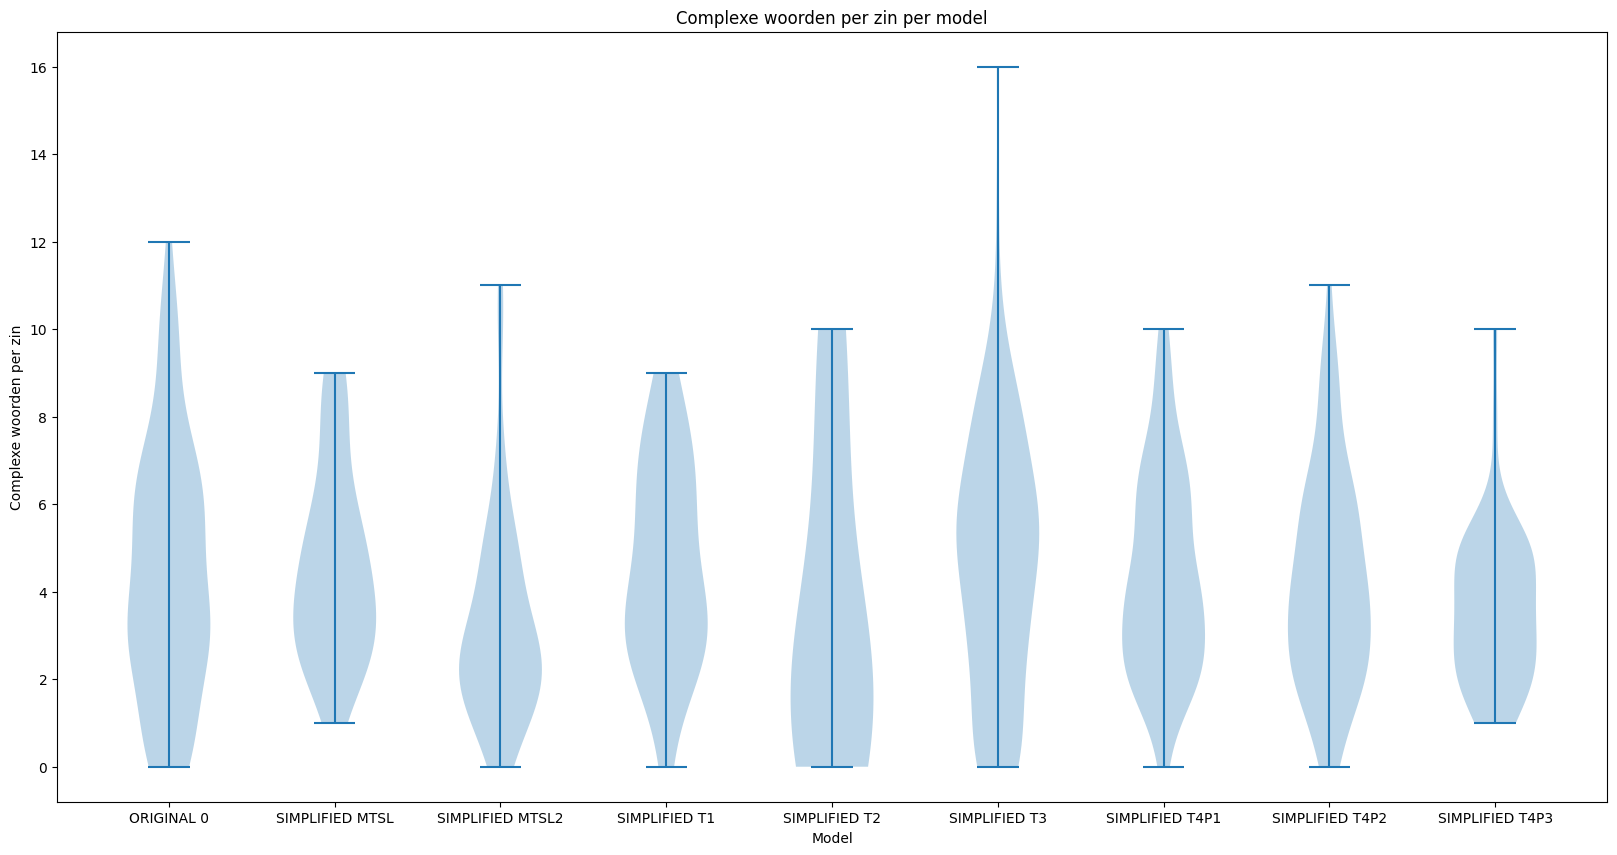

In [65]:
data = artikel_2.groupby('model')['complex_words']
data_list = [group[1].tolist() for group in data]

plt.figure(figsize=(20, 10))
plt.violinplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Complexe woorden per zin per model')
plt.xlabel('Model')
plt.ylabel('Complexe woorden per zin')
plt.savefig('violinplot-complex-a2.png')

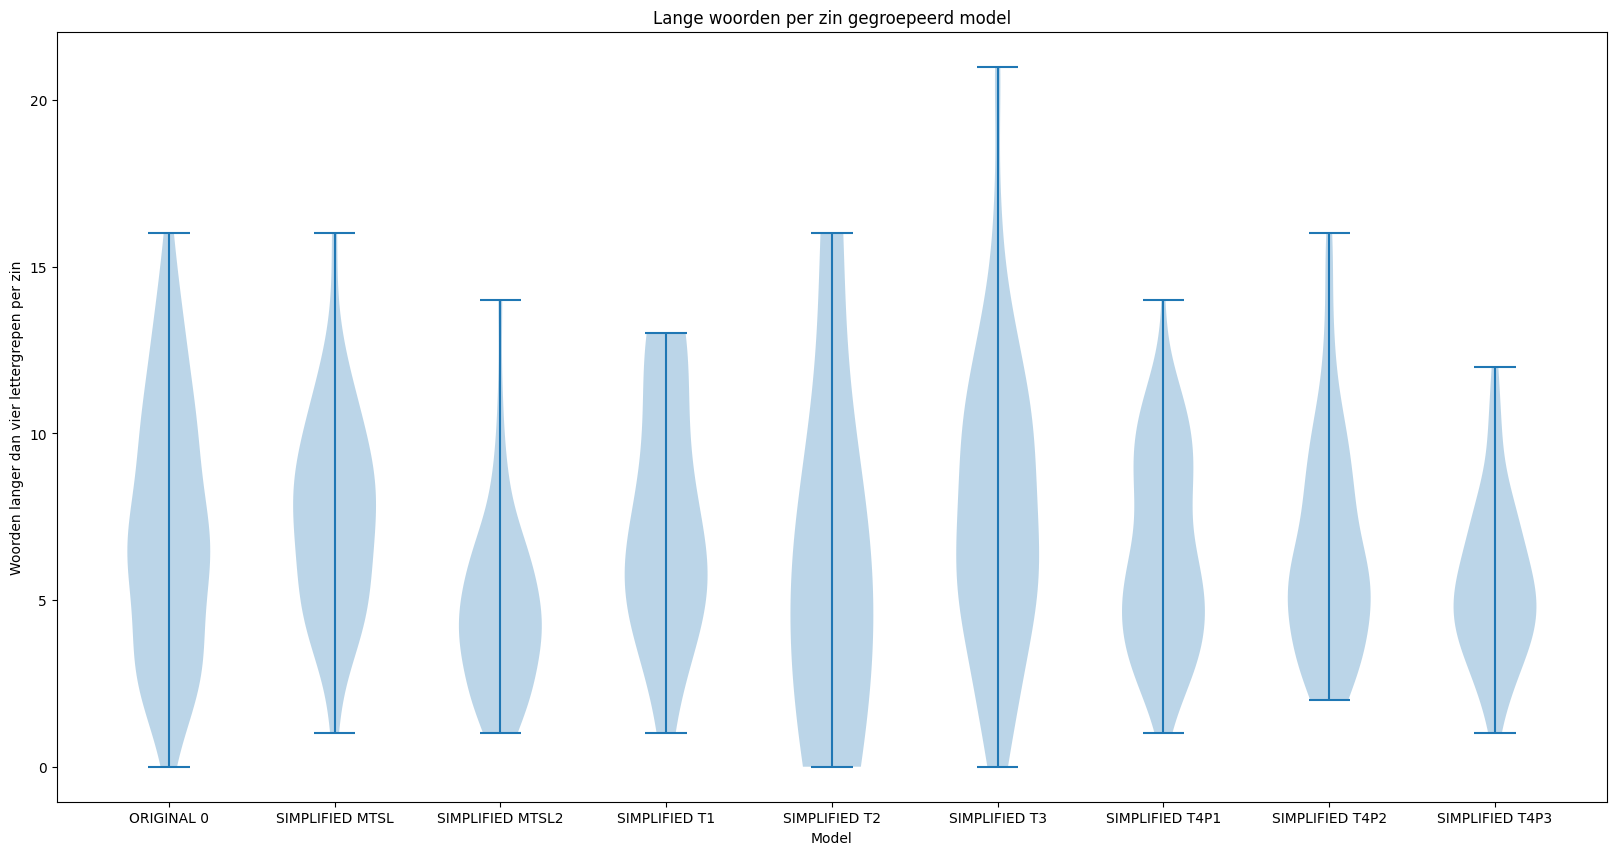

In [66]:
data = artikel_2.groupby('model')['long_words']
data_list = [group[1].tolist() for group in data]

plt.figure(figsize=(20, 10))
plt.violinplot(data_list)
plt.xticks(range(1, len(data_list) + 1), data.groups.keys())
plt.title('Lange woorden per zin gegroepeerd model')
plt.xlabel('Model')
plt.ylabel('Woorden langer dan vier lettergrepen per zin')
plt.savefig('violinplot-long-a2.png')

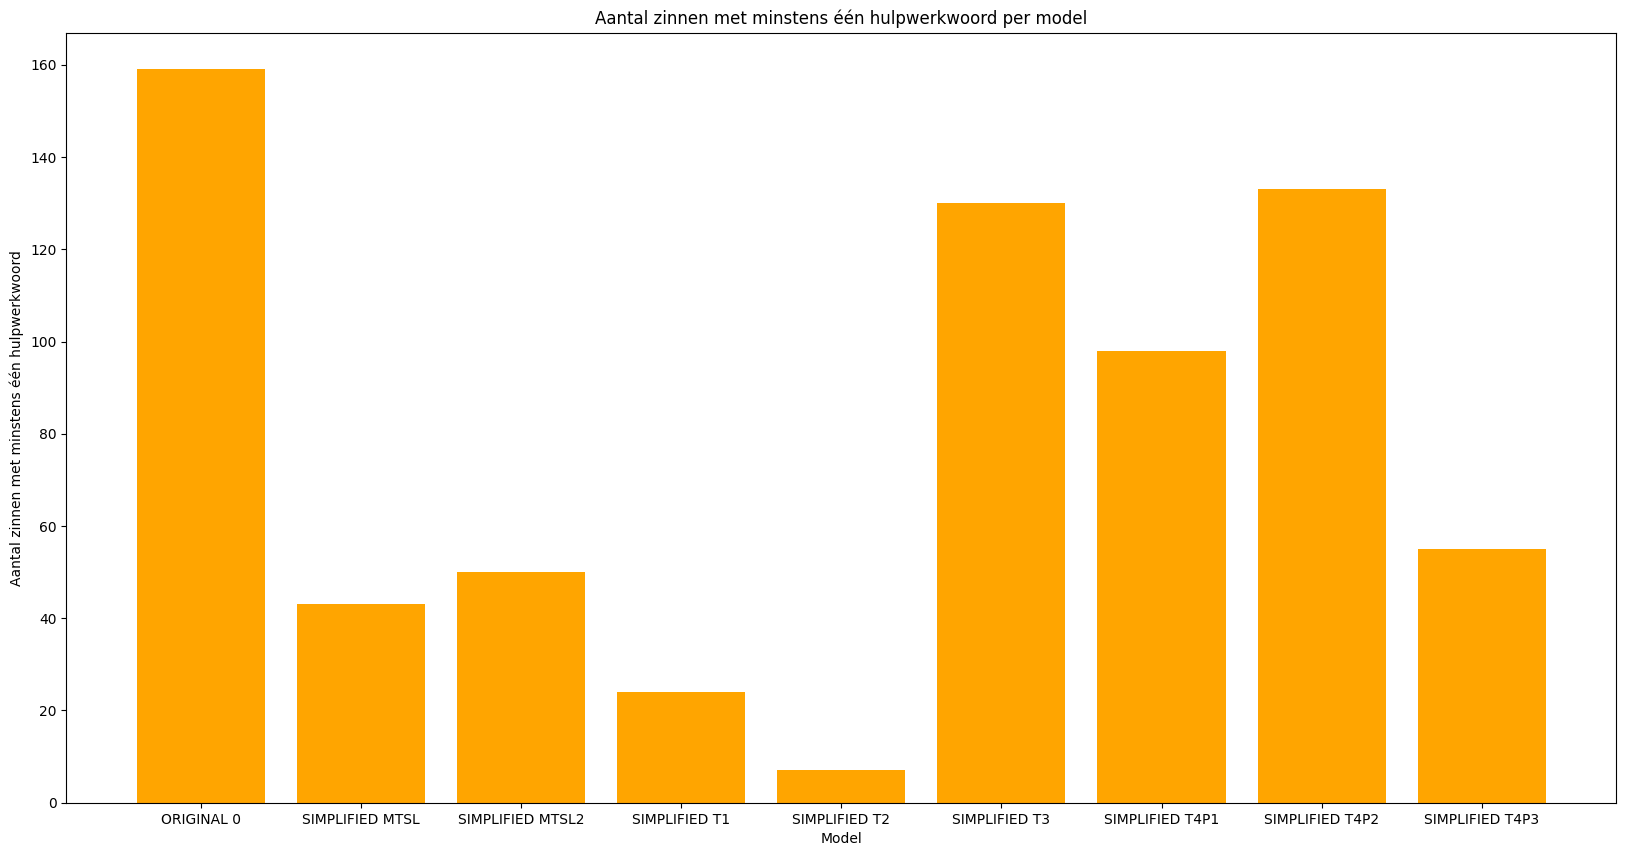

In [67]:
data = artikel_2.groupby('model')['auxverb'].count()
plt.figure(figsize=(20, 10))
color = 'orange'
plt.bar(data.index, data.values, color=color)
plt.xlabel('Model')
plt.ylabel('Aantal zinnen met minstens één hulpwerkwoord')
plt.title('Aantal zinnen met minstens één hulpwerkwoord per model')
plt.savefig('boxplot-aux-a2.png')

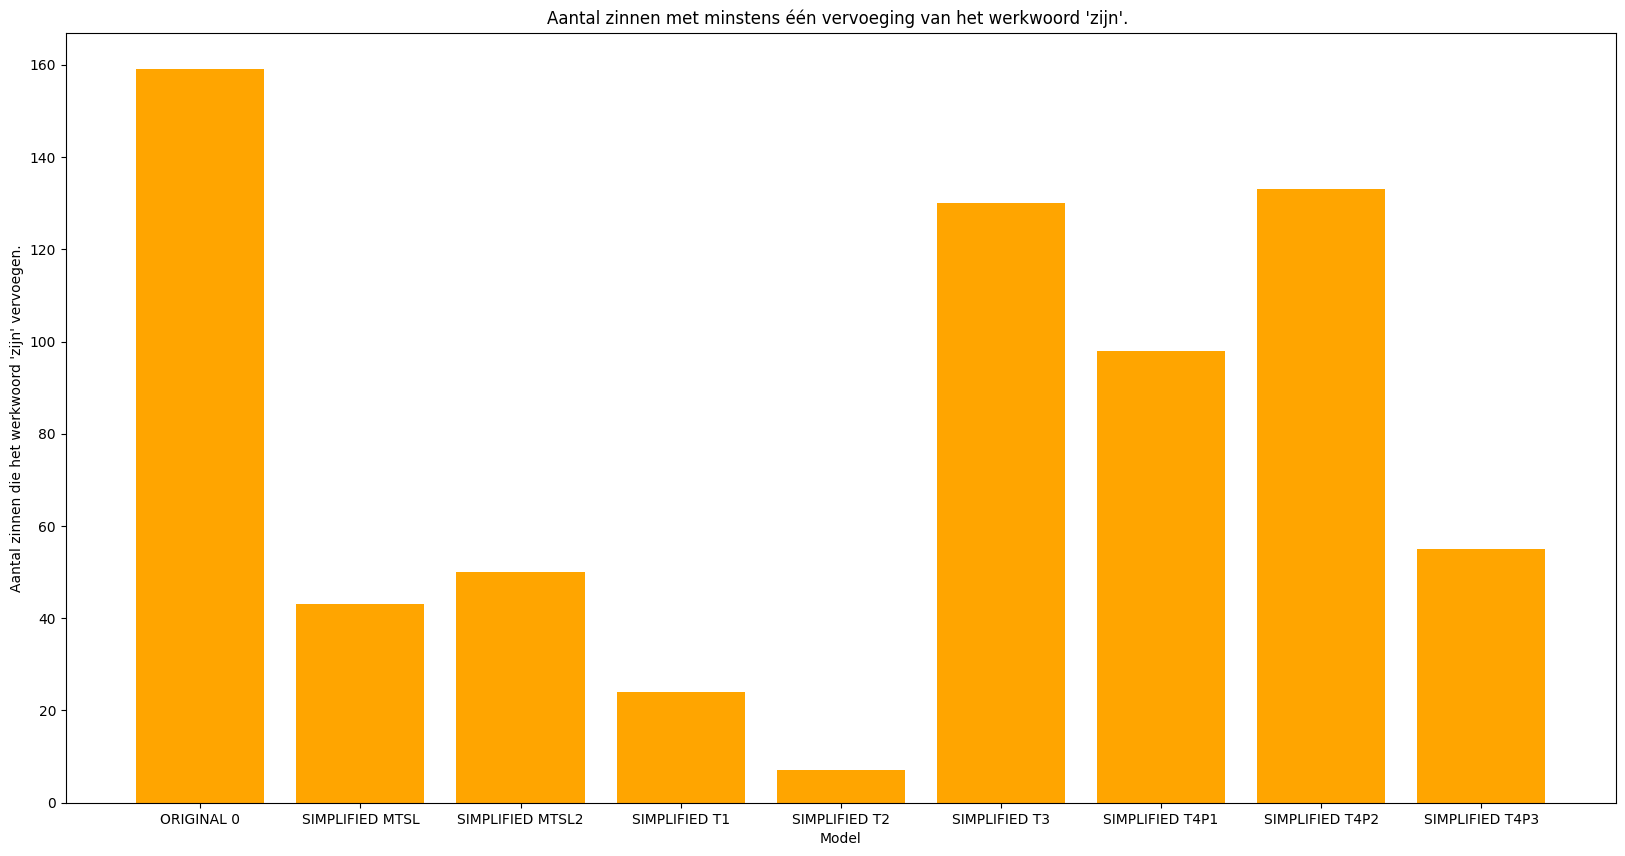

In [68]:
data = artikel_2.groupby('model')['tobeverb'].count()
plt.figure(figsize=(20, 10))
color = 'orange'
plt.bar(data.index, data.values, color=color)
plt.xlabel('Model')
plt.ylabel("Aantal zinnen die het werkwoord 'zijn' vervoegen.")
plt.title("Aantal zinnen met minstens één vervoeging van het werkwoord 'zijn'. ")
plt.savefig('boxplot-tobe-a2.png')